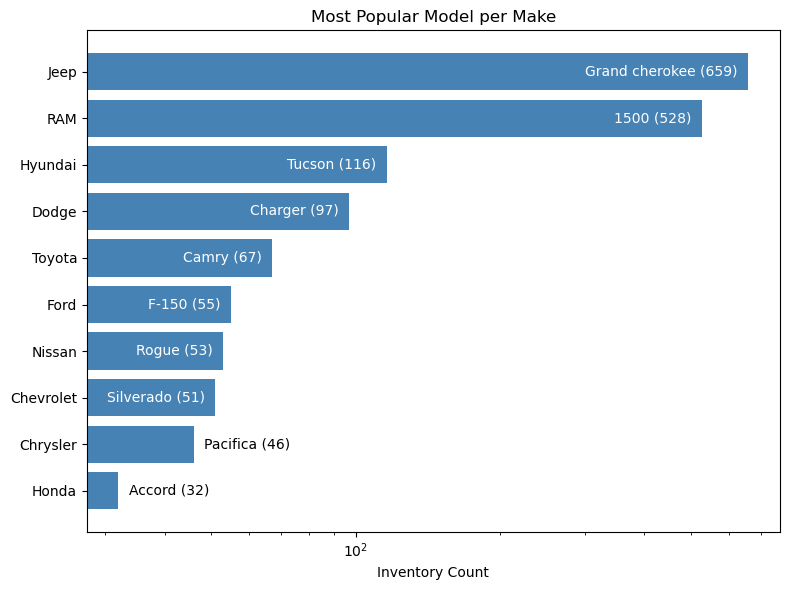

In [2]:
import re
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("LocalInv.csv")

# Count occurrences
model_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Count')

# Get most popular model per make
top_models = model_counts.sort_values('Count', ascending=False).drop_duplicates('Make')
top_models = top_models.sort_values('Count').tail(10)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(top_models['Make'], top_models['Count'], color='steelblue')

# Log scale
ax.set_xscale('log')
ax.set_xlabel('Inventory Count')
ax.set_title('Most Popular Model per Make')

for bar, count, model in zip(bars, top_models['Count'], top_models['Model']):
    y_pos = bar.get_y() + bar.get_height() / 2
    if count < 50:
        # Place label outside (to the right)
        ax.text(count * 1.05, y_pos, f"{model} ({count})",
                va='center', ha='left', color='black', fontsize=10)
    else:
        # Place label inside
        ax.text(count * 0.95, y_pos, f"{model} ({count})",
                va='center', ha='right', color='white', fontsize=10)


plt.tight_layout()
plt.show()
